In [7]:
import pandas as pd
# diff()값 시각화
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
plt.rcParams['font.family'] = 'Malgun Gothic'

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False # 마이너스 기호 깨짐 방지
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [8]:
# 버스 별 혼잡도 csv 파일 불러오기
t_143 = pd.read_csv('../혼잡도 시각화/혼잡도143.csv')
t_130 = pd.read_csv('../혼잡도 시각화/혼잡도130.csv')
t_140 = pd.read_csv('../혼잡도 시각화/혼잡도140.csv')
t_150 = pd.read_csv('../혼잡도 시각화/혼잡도150.csv')
t_152 = pd.read_csv('../혼잡도 시각화/혼잡도152.csv')
t_160 = pd.read_csv('../혼잡도 시각화/혼잡도160.csv')
t_272 = pd.read_csv('../혼잡도 시각화/혼잡도272.csv')
t_340 = pd.read_csv('../혼잡도 시각화/혼잡도340.csv')
t_360 = pd.read_csv('../혼잡도 시각화/혼잡도360.csv')
t_370 = pd.read_csv('../혼잡도 시각화/혼잡도370.csv')

# 전처리한 버스 별 csv파일 불러오기
bus_143 = pd.read_csv('./b_143.csv')
bus_130 = pd.read_csv('./b_130.csv')
bus_140 = pd.read_csv('./b_140.csv')
bus_150 = pd.read_csv('./b_150.csv')
bus_152 = pd.read_csv('./b_152.csv')
bus_160 = pd.read_csv('./b_160.csv')
bus_272 = pd.read_csv('./b_272.csv')
bus_340 = pd.read_csv('./b_340.csv')
bus_360 = pd.read_csv('./b_360.csv')
bus_370 = pd.read_csv('./b_370.csv')

In [9]:
def mapping(col):
    # 1. 17시 혼잡도
    cond1 = ((col['17시 혼잡도'] == '혼잡') | (col['17시 혼잡도'] == '매우혼잡'))
    # 2. 18시 혼잡도
    cond2 = ((col['18시_혼잡도'] == '혼잡') | (col['18시_혼잡도'] == '매우혼잡'))
    # 3. 19시 혼잡도
    cond3 = ((col['19시_혼잡도'] == '혼잡') | (col['19시_혼잡도'] == '매우혼잡'))
    # 4. 20시 혼잡도
    cond4 = ((col['20시_혼잡도'] == '혼잡') | (col['20시_혼잡도'] == '매우혼잡'))
    
    return [col[cond1], col[cond2], col[cond3], col[cond4]]

In [10]:
# 시간대별 혼잡도 분리 후 merge하는 함수
def splice(data, bus_name):
    x_17 = pd.merge(data[0], bus_name, on='정류소명', how='inner')
    x_18 = pd.merge(data[1], bus_name, on='정류소명', how='inner')
    x_19 = pd.merge(data[2], bus_name, on='정류소명', how='inner')
    x_20 = pd.merge(data[3], bus_name, on='정류소명', how='inner')
    
    # 승하차인원수 칼럼 추가
    if x_17.shape[0] > 1:
        x_17['승하차인원수'] = x_17['17시'].diff()
    if x_18.shape[0] > 1:
        x_18['승하차인원수'] = x_18['18시'].diff()
    if x_19.shape[0] > 1:
        x_19['승하차인원수'] = x_19['19시'].diff()
    if x_20.shape[0] > 1:
        x_20['승하차인원수'] = x_20['20시'].diff()
    return [x_17, x_18, x_19, x_20]

In [13]:
# 승하차 인원수 시각화 해주는 함수 정의
def show_plot(data):
    query = ['17', '18', '19', '20']
    for i in range(len(data)):
        plt.figure(figsize=(20, 8))
        if '승하차인원수' in data[i].columns:
            sns.barplot(x='정류소명', y='승하차인원수', data=data[i])
            sns.lineplot(x='정류소명', y='승하차인원수', data=data[i])
            plt.xticks(rotation=90)
            plt.title('{}시 승하차인원수'.format(query[i]))
    return plt.show()

#### 143번 버스

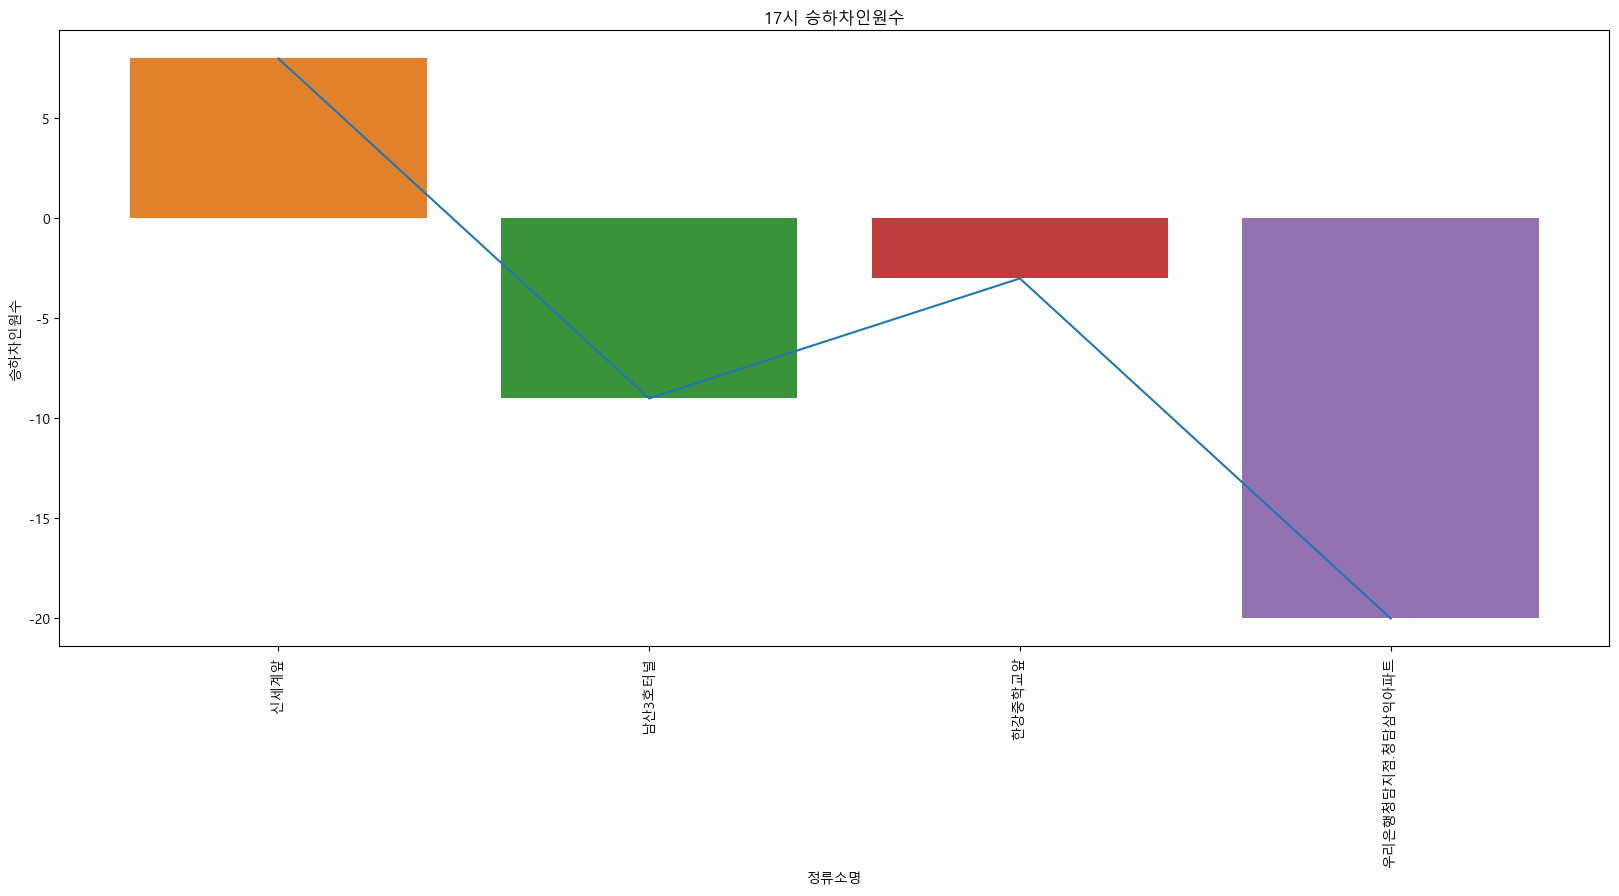

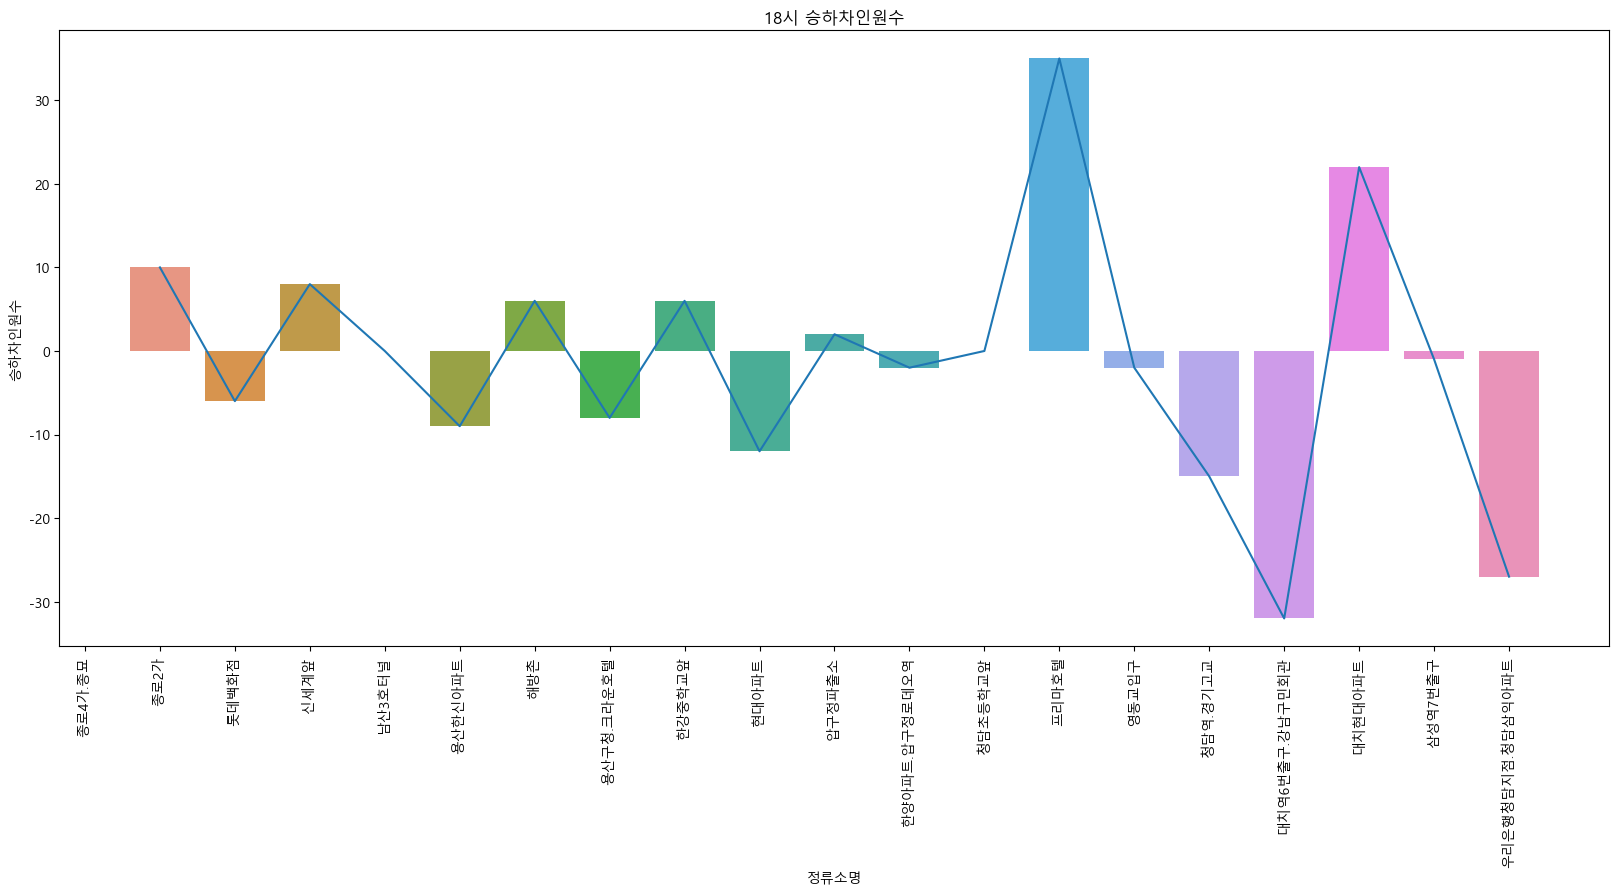

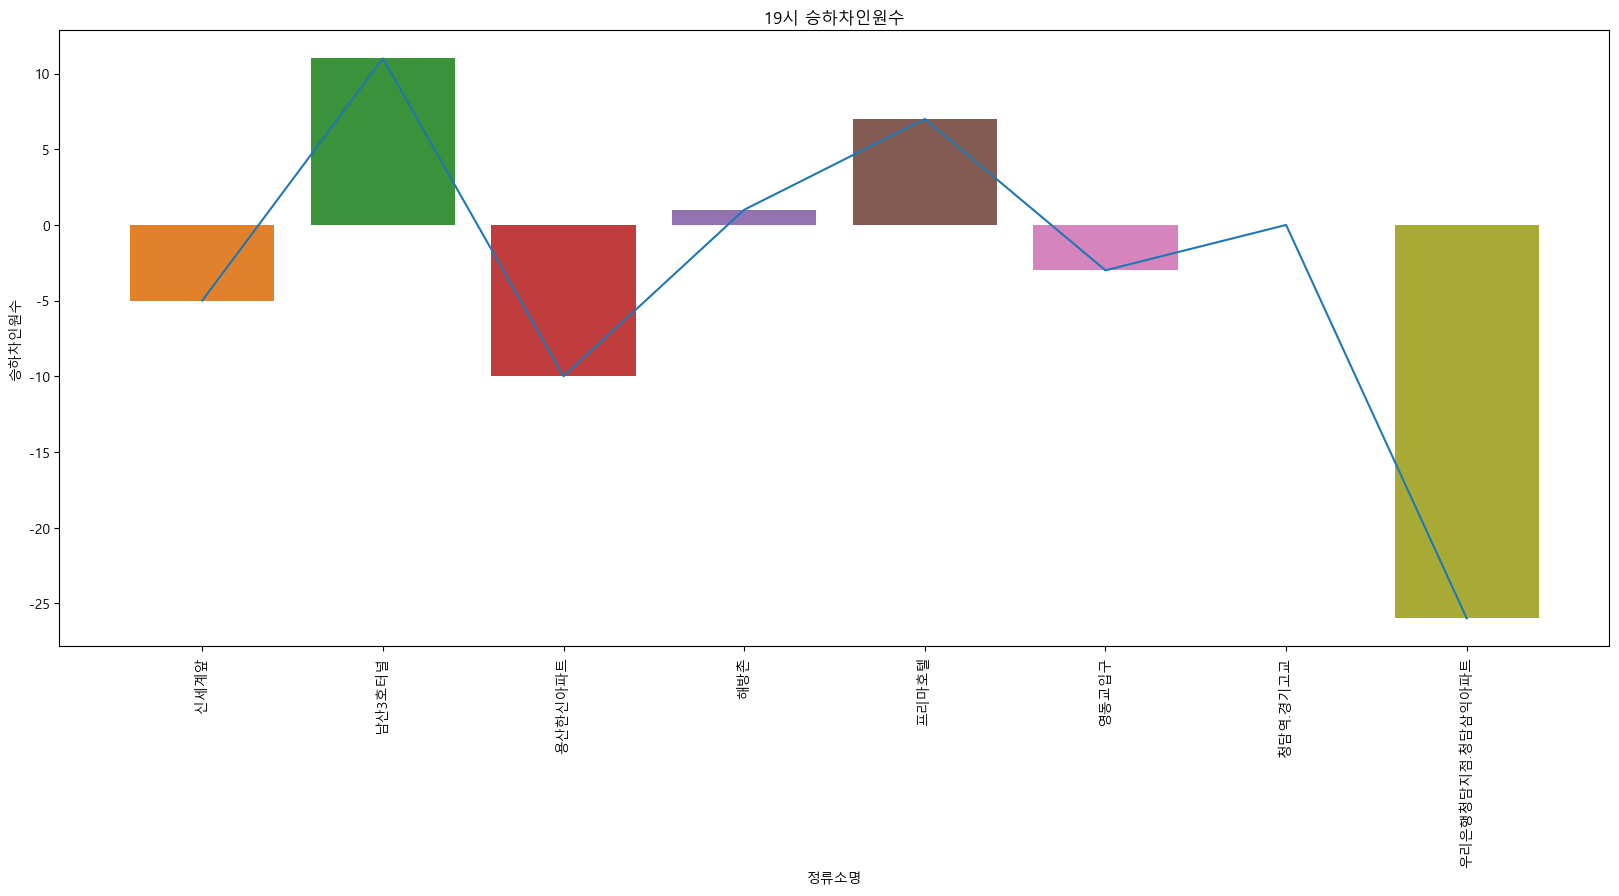

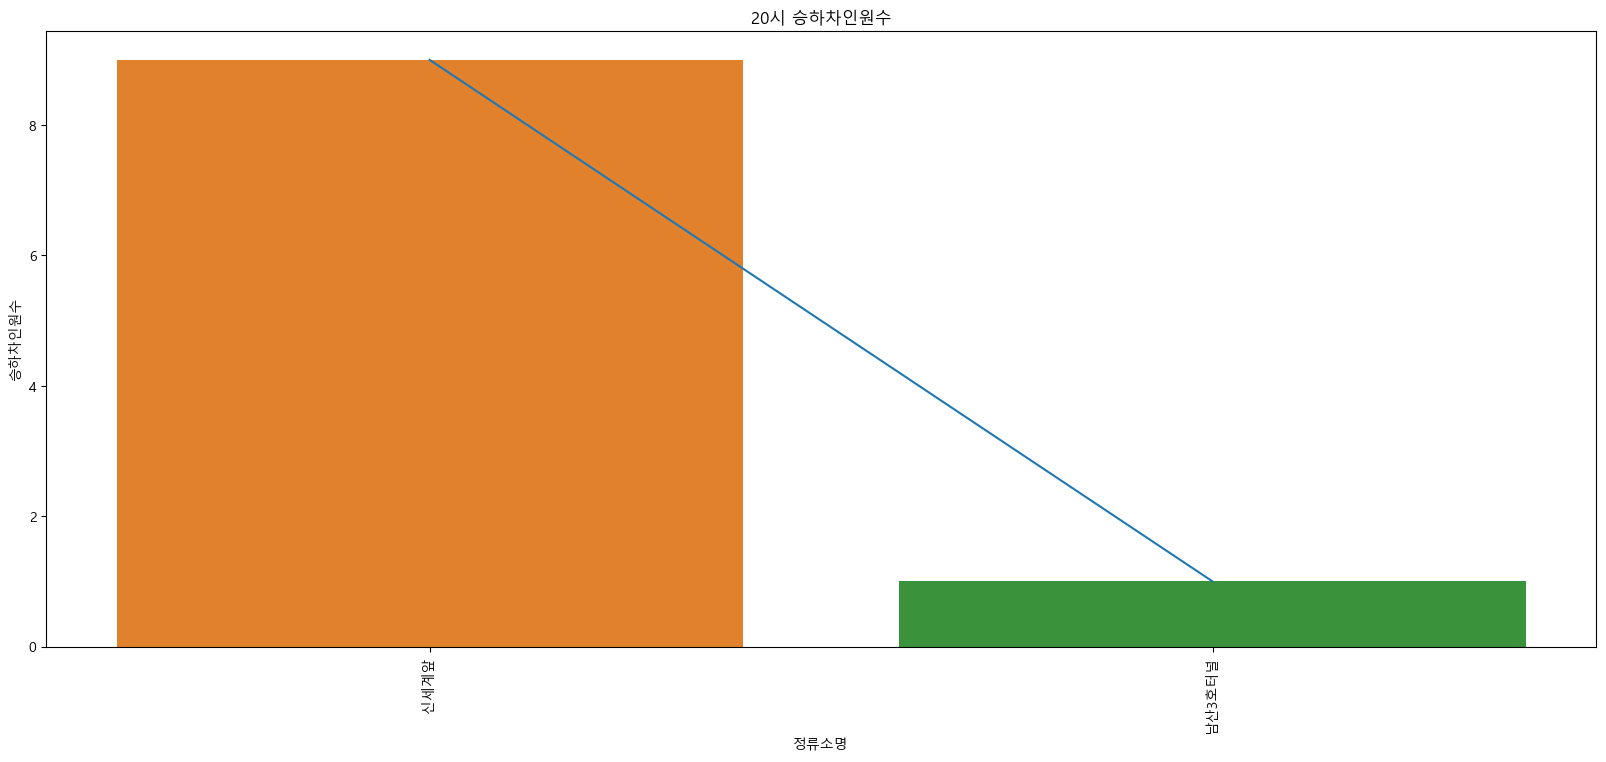

In [16]:
test = mapping(t_143)
lst = splice(test, bus_143)
show_plot(lst)

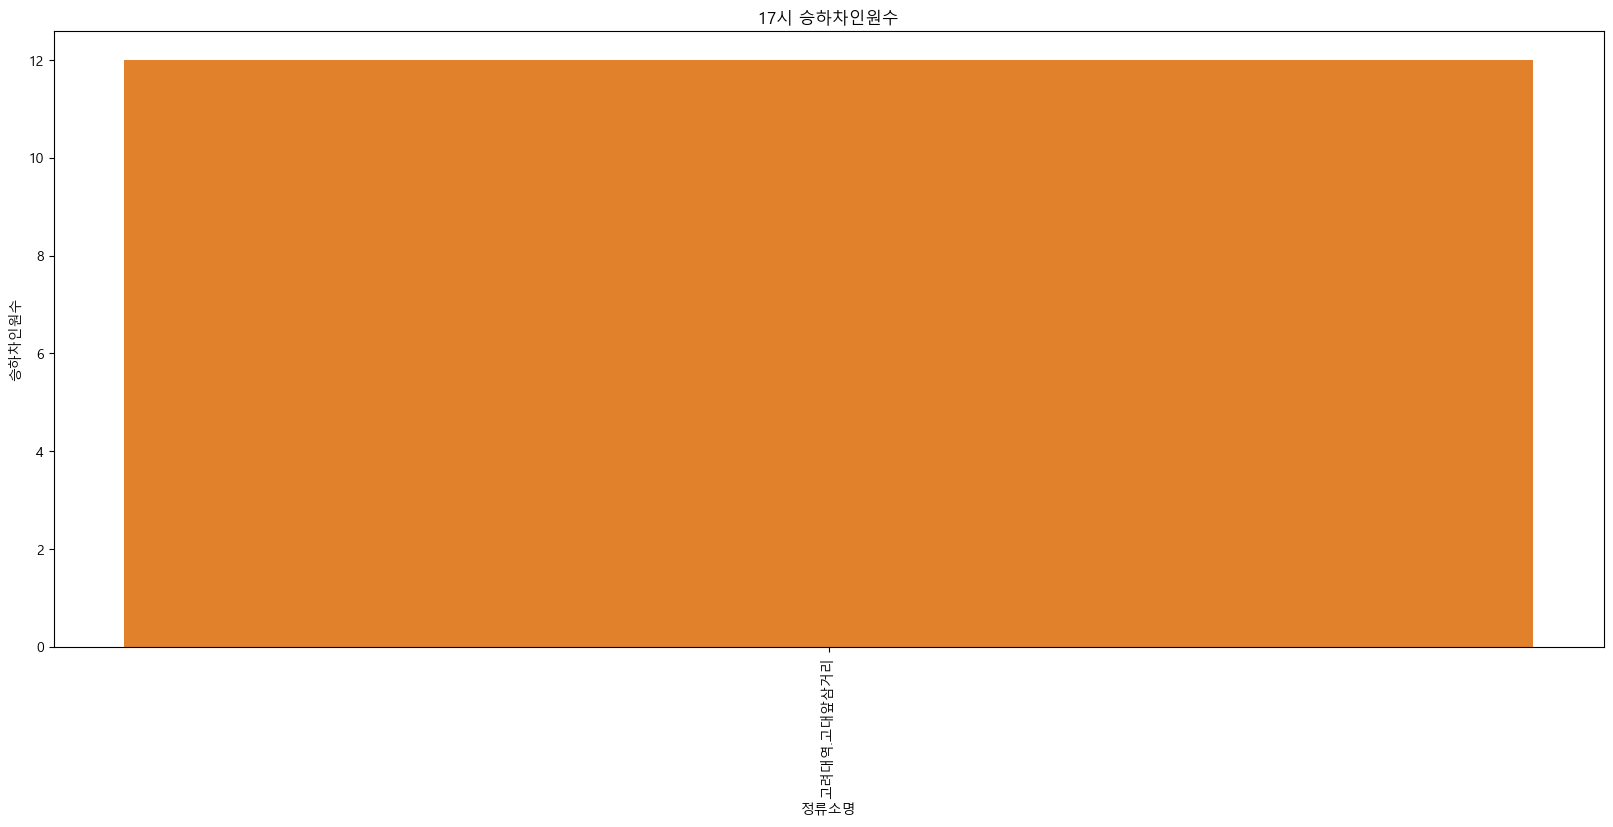

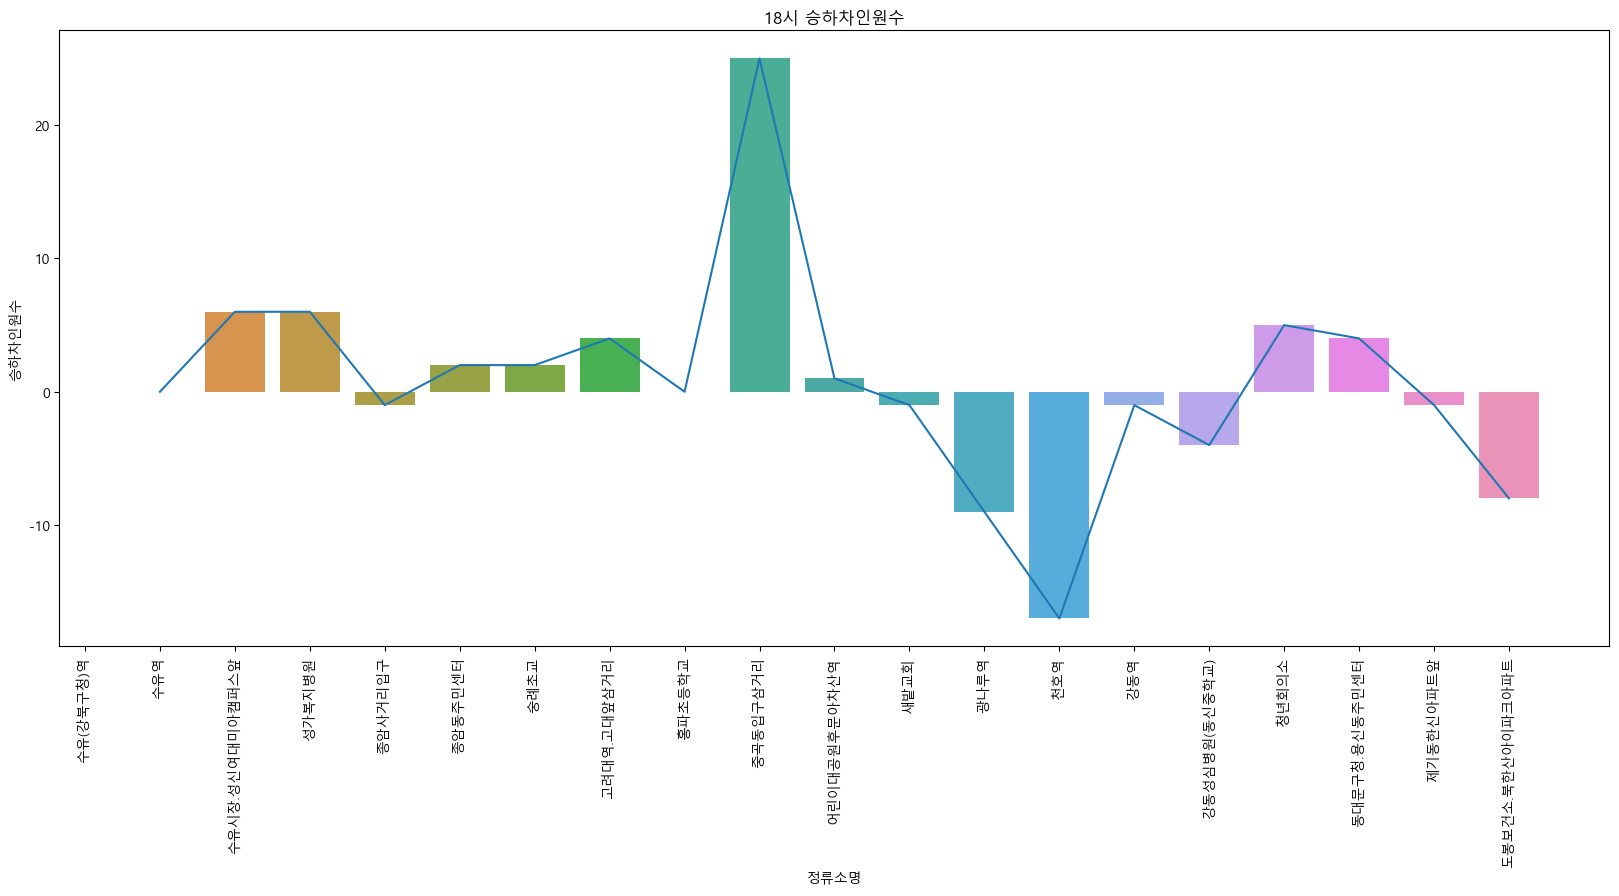

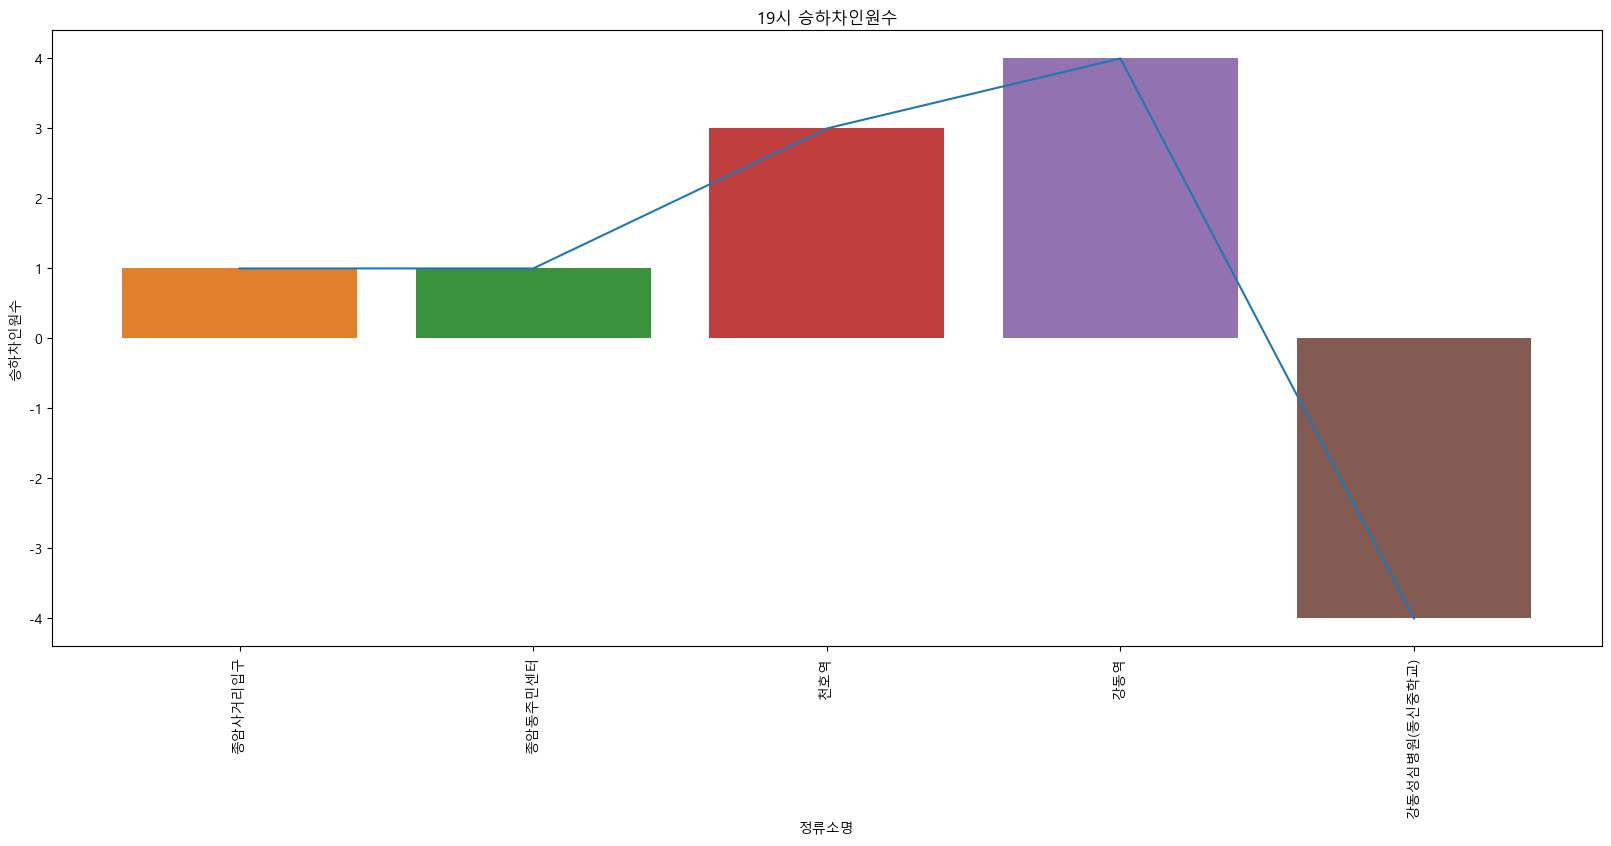

<Figure size 2000x800 with 0 Axes>

In [14]:
# test
test = mapping(t_130)
lst = splice(test, bus_130)
show_plot(lst)

In [49]:
'승하차인원수' in lst[0].columns 

True

In [20]:
data = mapping(t_130)

In [21]:
# 17시 혼잡도
b_130_17 = pd.merge(data[0], bus_130, on='정류소명', how='inner')
# 18시 혼잡도
b_130_18 = pd.merge(data[1], bus_130, on='정류소명', how='inner')
# 19시 혼잡도
b_130_19 = pd.merge(data[2], bus_130, on='정류소명', how='inner')
# 20시 혼잡도
b_130_20 = pd.merge(data[3], bus_130, on='정류소명', how='inner')

In [24]:
b_130_17.shape, b_130_18.shape, b_130_19.shape, b_130_20.shape

((2, 27), (20, 27), (6, 27), (1, 27))

#### 하차인원이 어디로 향할까?
- 승하차인원수 칼럼 추가

In [25]:
b_130_17['승하차인원수'] = b_130_17['17시'].diff()
b_130_18['승하차인원수'] = b_130_18['18시'].diff()
b_130_19['승하차인원수'] = b_130_19['19시'].diff()

In [27]:
# diff()값 시각화
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
plt.rcParams['font.family'] = 'Malgun Gothic'

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False # 마이너스 기호 깨짐 방지
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

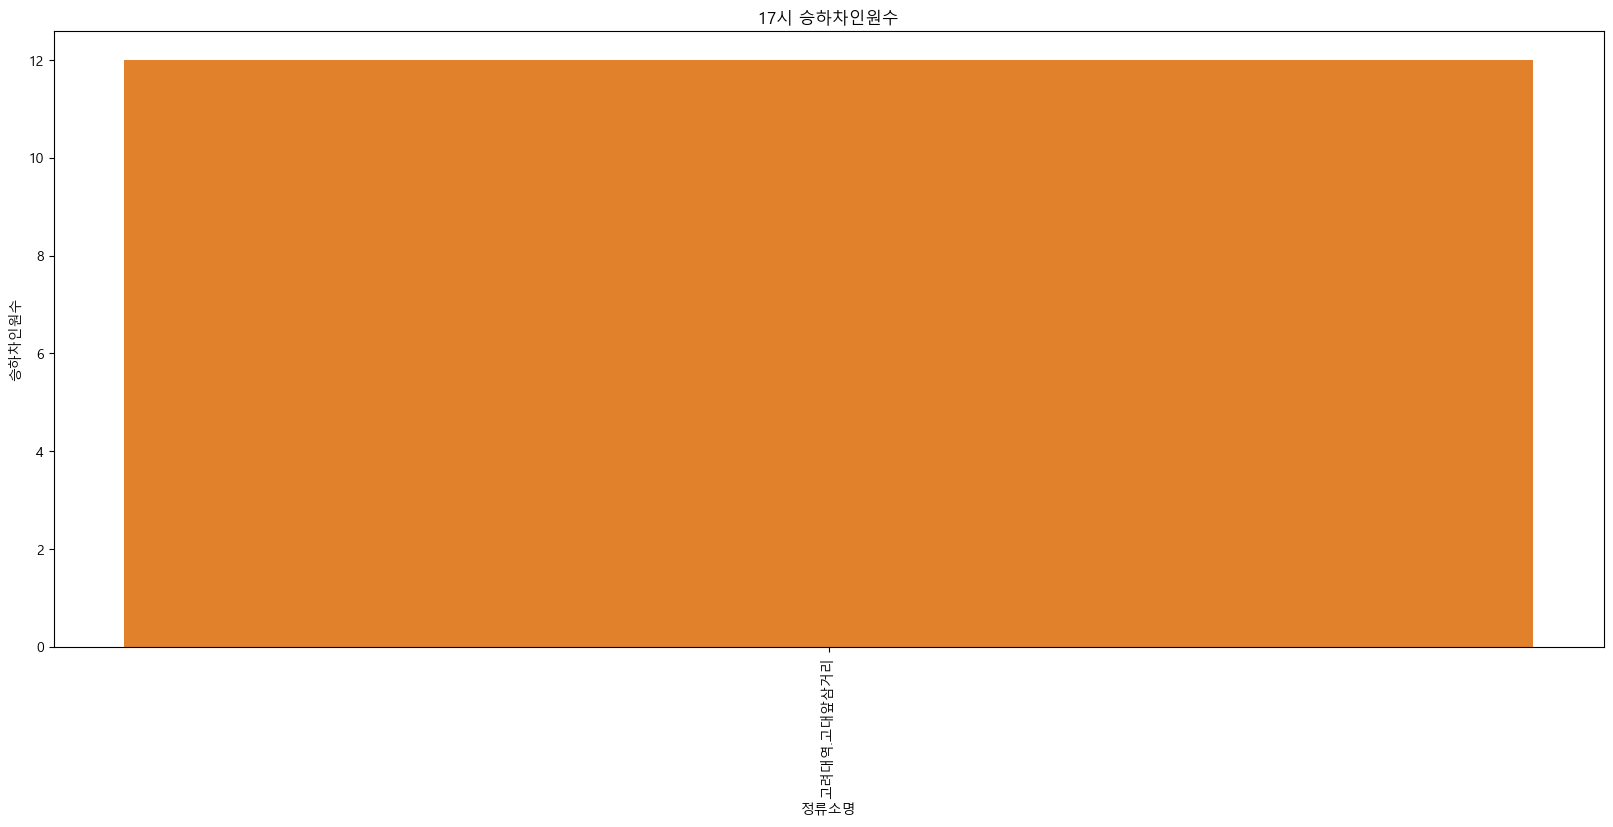

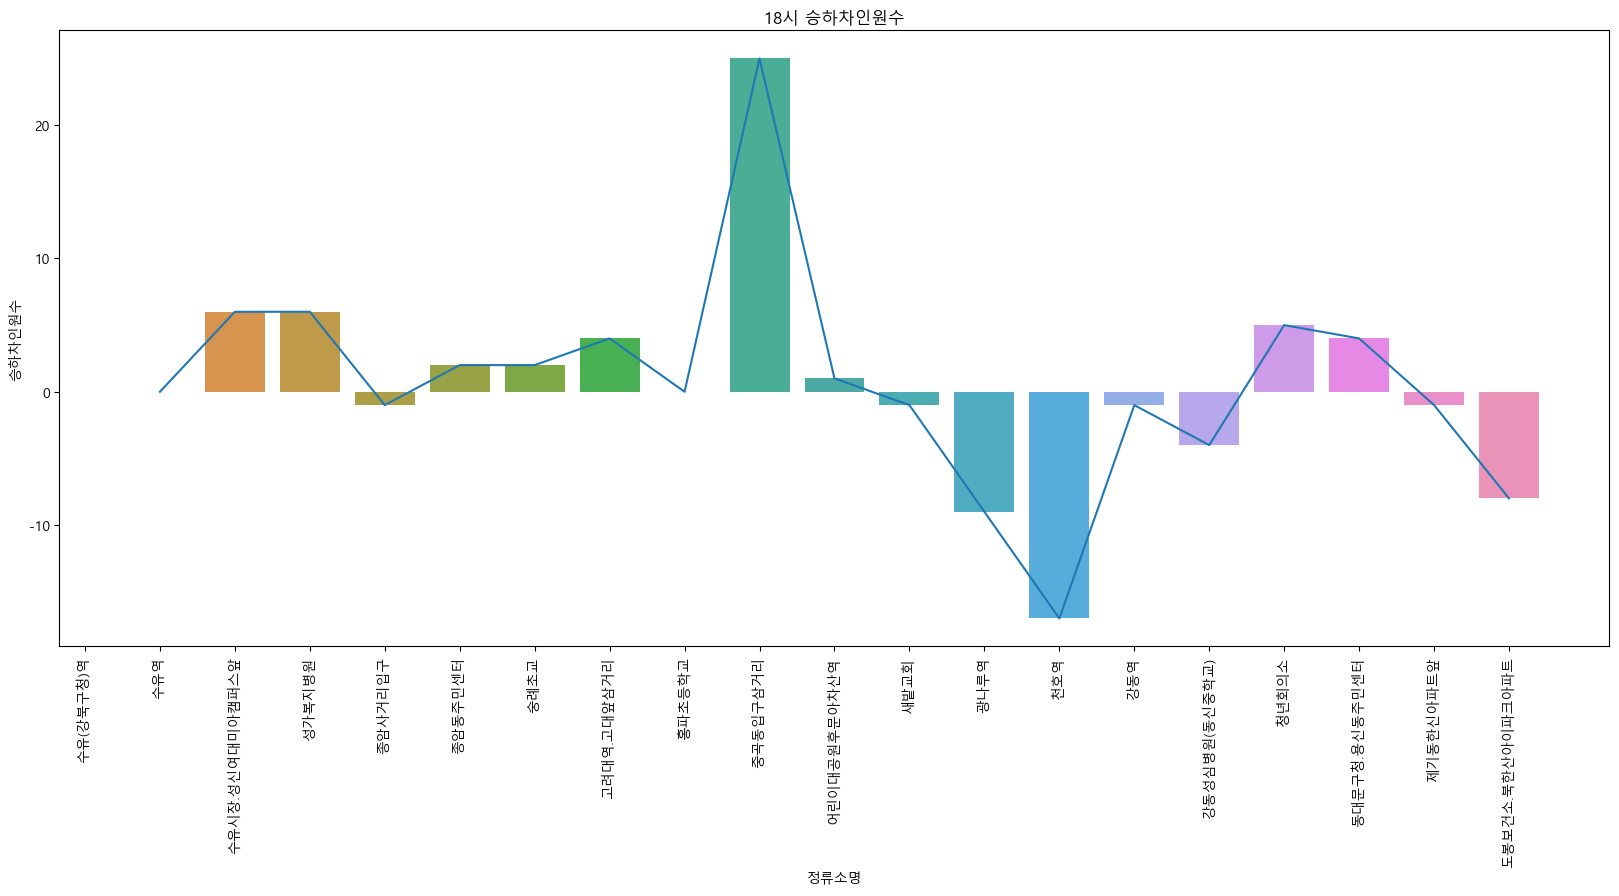

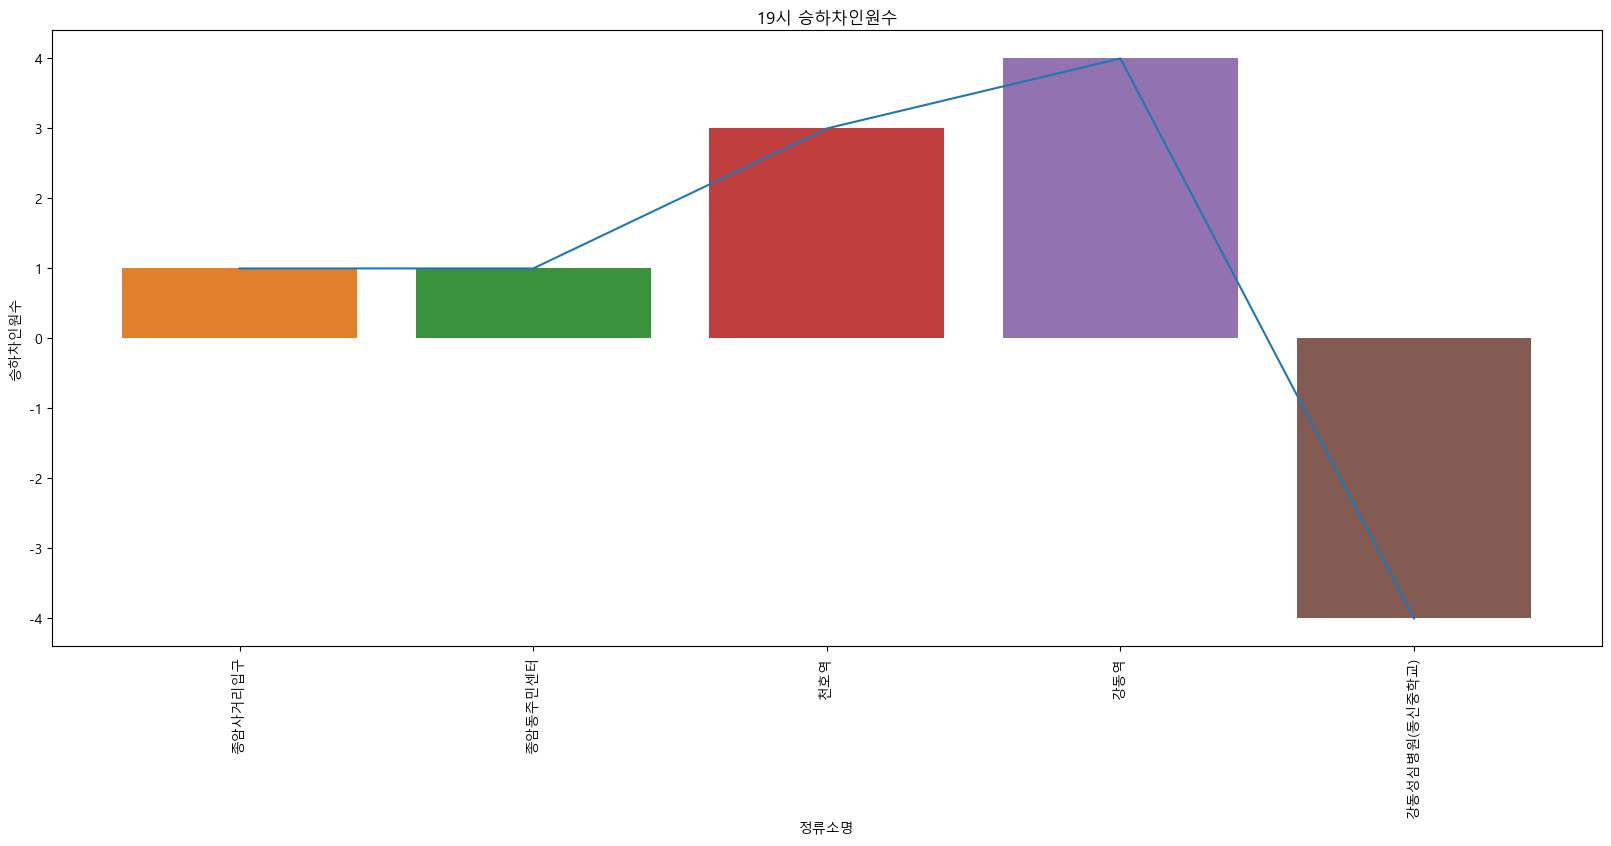

In [29]:
plt.figure(figsize=(20, 8))

sns.barplot(x='정류소명', y='승하차인원수', data=b_130_17)
sns.lineplot(x='정류소명', y='승하차인원수', data=b_130_17)
plt.xticks(rotation=90)
plt.title('17시 승하차인원수')
plt.show()

plt.figure(figsize=(20, 8))
sns.barplot(x='정류소명', y='승하차인원수', data=b_130_18)
sns.lineplot(x='정류소명', y='승하차인원수', data=b_130_18)
plt.xticks(rotation=90)
plt.title('18시 승하차인원수')
plt.show()

plt.figure(figsize=(20, 8))
sns.barplot(x='정류소명', y='승하차인원수', data=b_130_19)
sns.lineplot(x='정류소명', y='승하차인원수', data=b_130_19)
plt.xticks(rotation=90)
plt.title('19시 승하차인원수')
plt.show()

